# COVID Hubei Data

The [original article](https://www.thelancet.com/journals/laninf/article/FPIIS1473-3099%2820%2930119-5%2Ffulltext) references this [spreadsheet](https://docs.google.com/spreadsheets/d/1itaohdPiAeniCXNlntNztZ_oRvjh0HsGuJXUJWET008/edit#gid=0) as having `patient-level` data of patients verified to have contracted the [COVID-19 virus](https://www.cdc.gov/coronavirus/2019-ncov/index.html). However, that spreadsheet is now referencing a [GitHub](https://github.com/beoutbreakprepared/nCoV2019/tree/master/latest_data) location that stores a different data set. The original CSV files used seem to be located in a [different location with the same GitHub repository](https://github.com/beoutbreakprepared/nCoV2019/tree/master/covid19/raw-data). To our knowledge, there is no other dataset available online that has `patient-level` data. The original file is stored in an Excel file and there are two data sheets; one for patients inside of `Hubei` and one for those that are outside. Let's see what we have.

## Load Data

We have 2 data sheets, let's merge them into one. Does it really matter if the patients are in or outside of Hubei to the world at large? 

In [1]:
import pandas as pd

inside = pd.read_csv('./covid/data/00/COVID19_2020_open_line_list - Hubei.csv', low_memory=False)
outside = pd.read_csv('./covid/data/00/COVID19_2020_open_line_list - outside_Hubei.csv', low_memory=False)

outside = outside.drop(['data_moderator_initials'], axis=1)

data = pd.concat([inside, outside])

In [2]:
data.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id'],
      dtype='object')

The raw data has `47,201` records across `32` rows.

In [3]:
data.shape

(47201, 32)

## Age

The `age` field shows that age data is not kept consistently. In some cases, age is a whole number, in some cases, it is a float, yet, in many cases, age is a range. 

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')

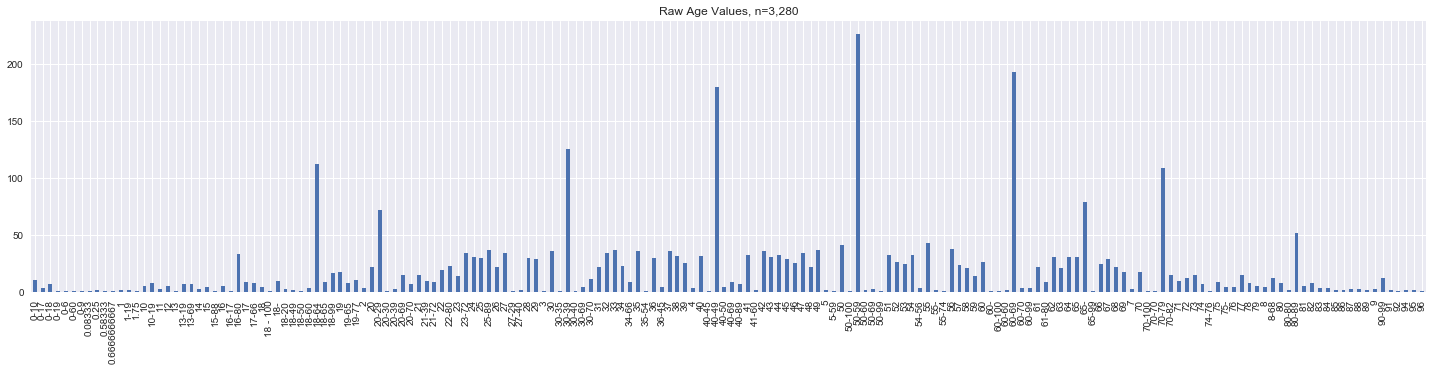

In [5]:
fig, ax = plt.subplots(figsize=(25, 5))

s = data.age.value_counts().sort_index()
n = s.sum()

_ = s.plot(kind='bar', ax=ax, title=f'Raw Age Values, n={n:,}')

Let's just look at the unique `age` values.

In [6]:
for i in data.age.value_counts().sort_index().index:
    print(f"'{i}'", end=',')

'0-10','0-17','0-18','0-19','0-6','0-60','0-9','0.08333','0.25','0.58333','0.6666666667','1','1-19','1.75','10','10-19','11','12','13','13-19','13-69','14','15','15-88','16','16-17','16-80','17','17-66','18','18 - 100','18-','18-20','18-49','18-50','18-60','18-64','18-65','18-99','19','19-65','19-77','2','20','20-29','20-30','20-39','20-69','20-70','21','21-39','21-72','22','22-80','23','23-72','24','25','25-89','26','27','27-29','27-40','28','29','3','30','30-35','30-39','30-40','30-69','30-70','31','32','33','34','34-66','35','35-54','36','36-45','37','38','39','4','40','40-45','40-49','40-50','40-69','40-89','41','41-60','42','43','44','45','46','47','48','49','5','5-59','50','50-100','50-59','50-60','50-69','50-99','51','52','53','54','54-56','55','55-','55-74','56','57','58','59','60','60-','60-100','60-60','60-69','60-70','60-99','61','61-80','62','63','64','65','65-','65-99','66','67','68','69','7','70','70-100','70-70','70-79','70-82','71','72','73','74','74-76','75','75-','76'

This map is an attempt to map the raw age values into the following age ranges.

* [0, 19],
* [20, 29],
* [30, 39],
* [40, 49],
* [50, 59],
* [60, 69],
* [70, 79],
* [80, 89], and
* [90, 99].

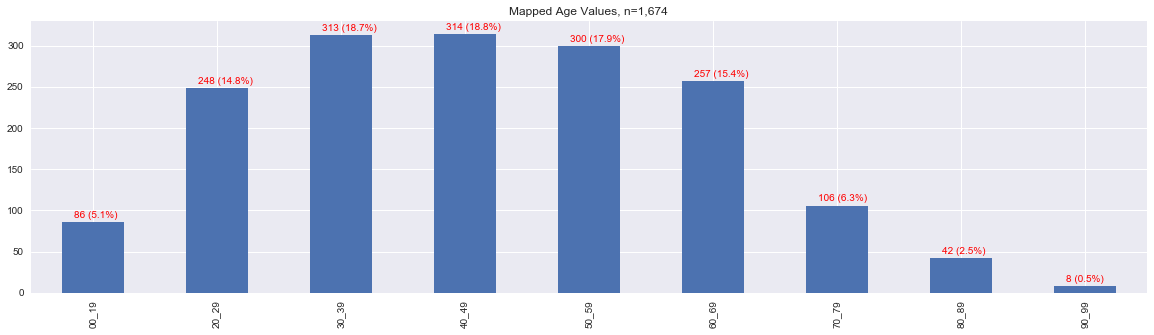

In [7]:
import numpy as np

age_map = {
    '00_19': set(['0-10','0-17','0-18','0-19','0-6','0-9','0.08333','0.25','0.58333','0.6666666667','1-19','1.75','10','10-19','13-19','16-17'] + [f"'{i}'" for i in range(20)]),
    '20_29': set(['20-29','27-29'] + [f"'{i}'" for i in range(20, 30)]),
    '30_39': set(['30-35','30-39'] + [f"'{i}'" for i in range(30, 40)]),
    '40_49': set(['40-45','40-49'] + [f"'{i}'" for i in range(40, 50)]),
    '50_59': set(['50-59','54-56', '55-'] + [f"'{i}'" for i in range(50, 60)]),
    '60_69': set(['60-','60-60','60-69','65-'] + [f"'{i}'" for i in range(60, 70)]),
    '70_79': set(['70-70','70-79','74-76','75-'] + [f"'{i}'" for i in range(70, 80)]),
    '80_89': set(['80-80','80-89'] + [f"'{i}'" for i in range(80, 90)]),
    '90_99': set(['90-99'] + [f"'{i}'" for i in range(90, 100)]),
}

get_age_group = lambda x: [k for k, v in age_map.items() if f"'{x}'" in v]

fig, ax = plt.subplots(figsize=(20, 5))

s = pd.Series(list(map(lambda arr: arr[0] if len(arr) > 0 else None, data.age.apply(lambda x: get_age_group(x))))).value_counts().sort_index()
n = s.sum()

_ = s.plot(kind='bar', ax=ax, title=f'Mapped Age Values, n={n:,}')

totals = [i.get_height() for i in ax.patches]
total = sum(totals)

for i in ax.patches:
    x = i.get_x() + 0.1
    y = i.get_height() + 5.0
    p = i.get_height() / total * 100.0
    s = f'{i.get_height()} ({p:.1f}%)'
    ax.text(x, y, s, fontsize=10, color='red')

## Sex

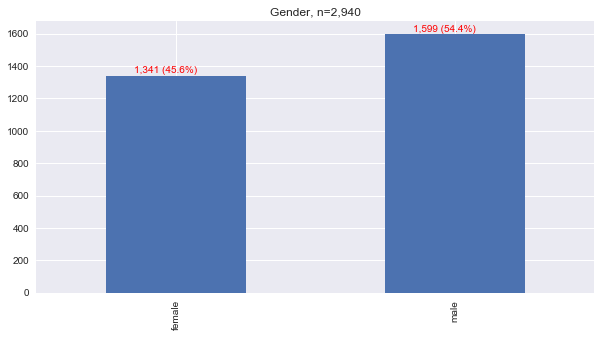

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

s = data.sex.value_counts().sort_index()
n = s.sum()

_ = s.plot(kind='bar', ax=ax, title=f'Gender, n={n:,}')

for i in ax.patches:
    x = i.get_x() + 0.1
    y = i.get_height() + 15.0
    p = i.get_height() / n * 100.0
    s = f'{i.get_height():,} ({p:.1f}%)'
    ax.text(x, y, s, fontsize=10, color='red')

## Chronic Disease

Only very few patients had a `yes` or `no` answer reported to indicate if the patient had chronic diseases. May we assume that missing values indicate `no`? Not really. Of the patients that were recorded to have a `yes` or `no` to having at least one chronic disease, over `86%` reported yes.

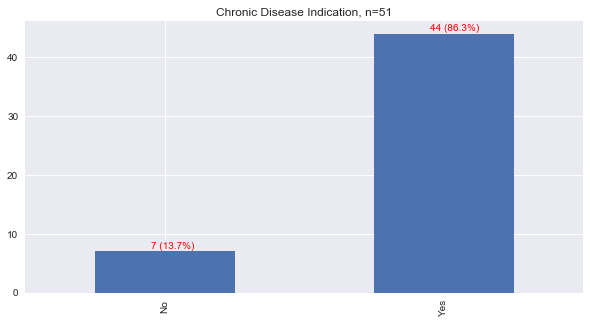

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

s = data.chronic_disease_binary.apply(lambda v: 'No' if v == 0.0 else 'Yes' if v == 1.0 else None).value_counts().sort_index()
n = s.sum()

_ = s.plot(kind='bar', ax=ax, title=f'Chronic Disease Indication, n={n}')

totals = [i.get_height() for i in ax.patches]
total = sum(totals)

for i in ax.patches:
    x = i.get_x() + 0.2
    y = i.get_height() + 0.5
    p = i.get_height() / n * 100.0
    s = f'{i.get_height()} ({p:.1f}%)'
    ax.text(x, y, s, fontsize=10, color='red')

Here, we map the disease to 4 main categories.

* hypertension,
* diabetes,
* coronary heart dieases, and
* other.

Other were basically diseases that had only a count of 1 and were all lumped in together. 

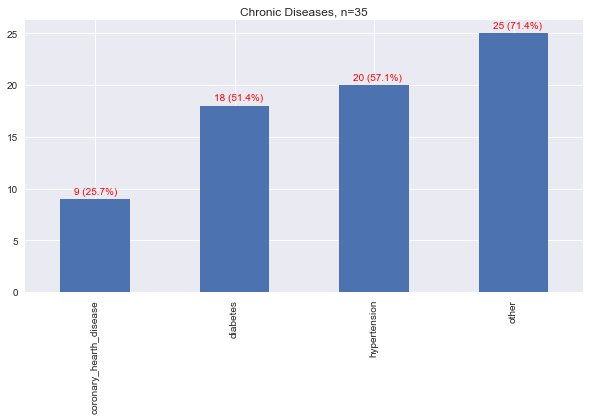

In [10]:
import itertools

def tokenize(s):
    if s is None or isinstance(s, float) or len(s) < 1 or pd.isna(s):
        return None
    try:
        delim = ';' if ';' in s else ','
        return [t.strip().lower() for t in s.split(delim) if len(t.strip()) > 0]
    except:
        return s
    
def map_to_disease(d):
    if 'hypertension' in d:
        return 'hypertension'
    elif 'diabetes' in d:
        return 'diabetes'
    elif 'coronary' in d or 'pulmonary' in d:
        return 'coronary_hearth_disease'
    else:
        return 'other'

diseases = [tokenize(s) for s in data.chronic_disease if s is not None]
diseases = [tokens for tokens in diseases if tokens is not None and len(tokens) > 0]
n = len(diseases)
diseases = list(itertools.chain(*[item for item in diseases]))

key = lambda s: map_to_disease(s)
diseases = sorted([(k, len(list(g))) for k, g in itertools.groupby(sorted(diseases, key=key), key)], key=lambda tup: tup[1], reverse=True)

s = pd.Series([tup[1] for tup in diseases], [tup[0] for tup in diseases]).sort_index()

fig, ax = plt.subplots(figsize=(10, 5))
_ = s.plot(kind='bar', ax=ax, title=f'Chronic Diseases, n={n}')

for i in ax.patches:
    x = i.get_x() + 0.10
    y = i.get_height() + 0.5
    p = i.get_height() / n * 100.0
    s = f'{i.get_height()} ({p:.1f}%)'
    ax.text(x, y, s, fontsize=10, color='red')

## Symptoms

Symptoms are also grouped. Note that the grouping approach is far from being medically correct; this exercise is merely to aggregate what could be similar based on spelling, meaning and similarity. However, the groupings do represent some of the major symptoms associated with COVID-19 (reference needed). The major categories of symptoms reportedly associated with COVID are

* fever,
* coughing, and
* joint/muscle pain.

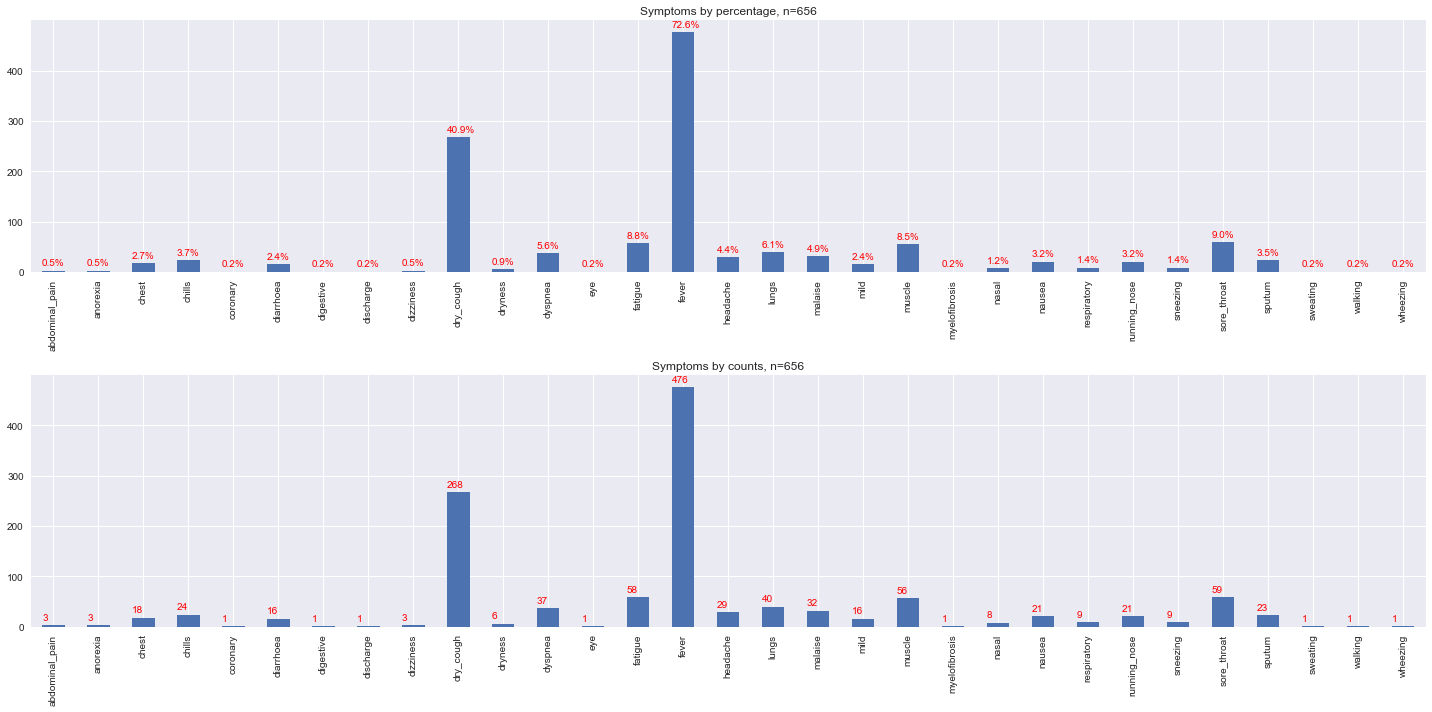

In [11]:
import json
import itertools

with open('./covid/data/00/symptom-mapping.json', 'r') as f:
    symptom_map = json.load(f)
    
def map_to_symptoms(s):
    if s.startswith('fever') or s.startswith('low fever'):
        return ['fever']
    return [k for k, v in symptom_map.items() if s in v]

symptoms = [tokenize(s) for s in data.symptoms if s is not None]
symptoms = [tokens for tokens in symptoms if tokens is not None and len(tokens) > 0]
n = len(symptoms)

symptoms = list(itertools.chain(*[item for item in symptoms]))
symptoms = list(itertools.chain(*[map_to_symptoms(s) for s in symptoms]))

key = lambda s: s
symptoms = sorted([(k, len(list(g))) for k, g in itertools.groupby(sorted(symptoms, key=key), key) if k != 'other'], key=lambda tup: tup[1], reverse=True)

s = pd.Series([tup[1] for tup in symptoms], [tup[0] for tup in symptoms]).sort_index()

fig, ax = plt.subplots(2, 1, figsize=(20, 10))

_ = s.plot(kind='bar', ax=ax[0], title=f'Symptoms by percentage, n={n}')
_ = s.plot(kind='bar', ax=ax[1], title=f'Symptoms by counts, n={n}')

for i in ax[0].patches:
    x = i.get_x() + 0.0
    y = i.get_height() + 10.0
    p = i.get_height() / n * 100.0
    s = f'{p:.1f}%'
    ax[0].text(x, y, s, fontsize=10, color='red')
    
for i in ax[1].patches:
    x = i.get_x() + 0.0
    y = i.get_height() + 10.0
    p = i.get_height() / n * 100.0
    s = f'{i.get_height()}'
    ax[1].text(x, y, s, fontsize=10, color='red')
    
plt.tight_layout()

## Wuhan Residency

[Wuhan](https://www.google.com/maps/place/Wuhan,+Hubei,+China/@30.5683363,114.1599568,11z/data=!3m1!4b1!4m5!3m4!1s0x342eaef8dd85f26f:0x39c2c9ac6c582210!8m2!3d30.592849!4d114.305539) is the capital of the [Hubei]() province in China, and the original epicenter of the COVID-19 virus. This data is mainly focused on patients infected in Hubei. Let's see how many patients lived in Wuhan.

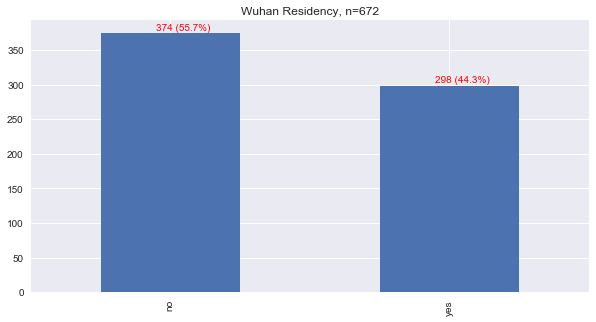

In [12]:
def map_wuhan_residency(v):
    if v is None or pd.isna(v):
        return None
    
    r = v.lower()
    if 'no' in r:
        return 'no'
    return 'yes'

s = data.lives_in_Wuhan.apply(lambda v: map_wuhan_residency(v))
s = s[s != None]
s = s.value_counts()
n = s.sum()

fig, ax = plt.subplots(figsize=(10, 5))

_ = s.plot(kind='bar', ax=ax, title=f'Wuhan Residency, n={n}')

for i in ax.patches:
    x = i.get_x() + 0.20
    y = i.get_height() + 5.0
    p = i.get_height() / n * 100.0
    s = f'{i.get_height()} ({p:.1f}%)'
    ax.text(x, y, s, fontsize=10, color='red')

## Travel History

Let's see how many people recorded travel. Note, we assume that a record without a travel record did **NOT** travel, and this assumption is likely wrong. With this assumption, less than 2% of the patients were recorded to have a travel history.

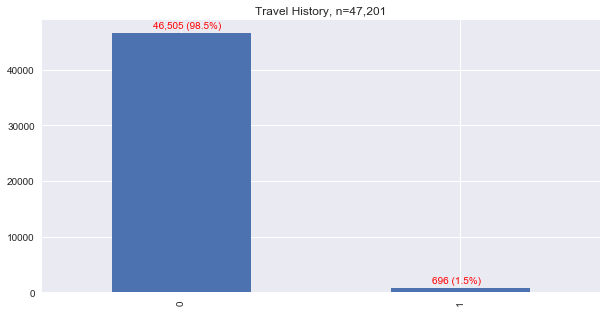

In [13]:
def map_travel(v):
    if v is None or pd.isna(v):
        return 0
    return 1

s = data.travel_history_dates.apply(lambda v: map_travel(v))
s = s[s != None]
s = s.value_counts()
n = s.sum()

fig, ax = plt.subplots(figsize=(10, 5))

_ = s.plot(kind='bar', ax=ax, title=f'Travel History, n={n:,}')

for i in ax.patches:
    x = i.get_x() + 0.15
    y = i.get_height() + 1000.0
    p = i.get_height() / n * 100.0
    s = f'{i.get_height():,} ({p:.1f}%)'
    ax.text(x, y, s, fontsize=10, color='red')

## Outcomes

Surprisingly, less than 20 cases were reported to result in an outcome of `death`, while the vast majority of patients ended up being `discharged`, followed by being listed in `stable` condition.

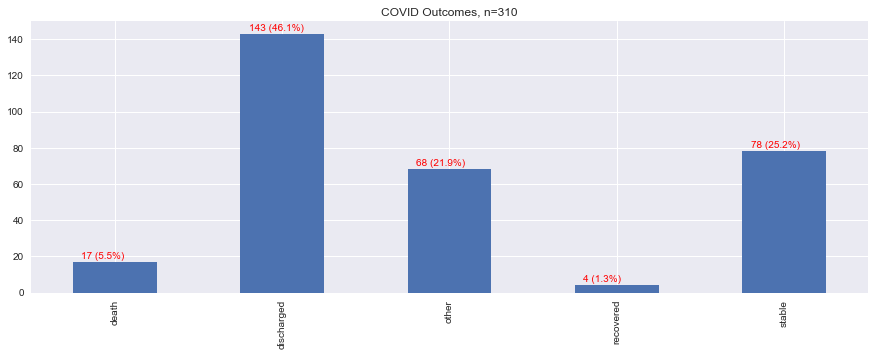

In [14]:
def map_outcome(v):
    if v is None:
        return None
    if isinstance(v, float):
        return None
    
    o = v.lower()
    
    if 'discharge' in o:
        return 'discharged'
    elif 'stable' in o:
        return 'stable'
    elif 'death' in o or 'dead' in o:
        return 'death'
    elif 'recov' in o:
        return 'recovered'
    else:
        return 'other'
    
s = data.outcome.apply(lambda v: map_outcome(v)).value_counts().sort_index()
n = s.sum()

fig, ax = plt.subplots(figsize=(15, 5))
_ = s.plot(kind='bar', ax=ax, title=f'COVID Outcomes, n={n:,}')

for i in ax.patches:
    x = i.get_x() + 0.05
    y = i.get_height() + 2.0
    p = i.get_height() / n * 100.0
    s = f'{i.get_height()} ({p:.1f}%)'
    ax.text(x, y, s, fontsize=10, color='red')

## Modeling

Let's try to model how age, gender, chronic diseases and symptoms influence prognosis of death. Filtering through the data, we lose ever more records; from over `47,000` to just a little over `200`. Without further data manipulation, we have only `200` of `310` (about `65%`) patients with a known reported outcome left for the analysis. Also, we transform the data to be nearly all binary.

In [15]:
data[['age', 'sex', 'chronic_disease', 'symptoms', 'outcome']].shape

(47201, 5)

In [16]:
data[['age', 'sex', 'chronic_disease', 'symptoms', 'outcome']].dropna(how='all').shape

(3605, 5)

In [17]:
def get_single_age_group(x):
    groups = get_age_group(x)
    return None if len(groups) < 1 else groups[0]

d = data[['age', 'sex', 'chronic_disease', 'symptoms', 'outcome', 'travel_history_dates', 'lives_in_Wuhan']].dropna(how='all').copy(deep=True)
d.age = d.age.apply(lambda x: get_single_age_group(x))
d = d[pd.notna(d.age)]
d.age = d.age.apply(lambda a: int(a.split('_')[0]))
print(d.shape)

d.sex = d.sex.apply(lambda v: 1 if v == 'male' else 0)

d.outcome = d.outcome.apply(lambda v: map_outcome(v))
d = d[pd.notna(d.outcome)]
d.outcome = d.outcome.apply(lambda v: 1 if v == 'death' else 0)
print(d.shape)

d.chronic_disease = d.chronic_disease.apply(lambda s: tokenize(s))
d.chronic_disease = d.chronic_disease.apply(lambda tokens: [map_to_disease(d) for d in tokens] if tokens is not None else None)

d.symptoms = d.symptoms.apply(lambda s: tokenize(s))
d.symptoms = d.symptoms.apply(lambda tokens: [map_to_symptoms(s) for s in tokens] if tokens is not None else None)
d.symptoms = d.symptoms.apply(lambda arrs: None if arrs is None else list(itertools.chain(*arrs)))

d['hypertension'] = d.chronic_disease.apply(lambda arr: 0 if arr is None else 1 if 'hypertension' in arr else 0)
d['chd'] = d.chronic_disease.apply(lambda arr: 0 if arr is None else 1 if 'coronary_hearth_disease' in arr else 0)
d['diabetes'] = d.chronic_disease.apply(lambda arr: 0 if arr is None else 1 if 'diabetes' in arr else 0)

for s in symptom_map.keys():
    d[s] = d.symptoms.apply(lambda arr: 0 if arr is None else 1 if s in arr else 0)

d['wuhan'] = d.lives_in_Wuhan.apply(lambda v: 1 if map_wuhan_residency(v) == 'yes' else 0)
d['travel'] = d.travel_history_dates.apply(lambda v: map_travel(v))

d = d.drop(['chronic_disease', 'symptoms', 'travel_history_dates', 'lives_in_Wuhan'], axis=1)
print(d.shape)

d

(1674, 7)
(205, 7)
(205, 40)


,age,sex,outcome,hypertension,chd,diabetes,anosmia,sputum,muscle,chills,...,discharge,dizziness,dryness,digestive,coronary,mild,myelofibrosis,sweating,wuhan,travel
0,30,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,60,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
5,80,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21840,90,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23099,30,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
23100,30,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
23102,60,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
d.describe()

,age,sex,outcome,hypertension,chd,diabetes,anosmia,sputum,muscle,chills,...,discharge,dizziness,dryness,digestive,coronary,mild,myelofibrosis,sweating,wuhan,travel
count,205.000000,205.00000,205.000000,205.000000,205.000000,205.000000,205.0,205.000000,205.000000,205.000000,...,205.0,205.000000,205.0,205.0,205.0,205.0,205.000000,205.0,205.000000,205.000000
mean,44.292683,0.57561,0.048780,0.073171,0.034146,0.058537,0.0,0.019512,0.024390,0.029268,...,0.0,0.004878,0.0,0.0,0.0,0.0,0.004878,0.0,0.317073,0.278049
std,20.889818,0.49546,0.215936,0.261054,0.182050,0.235330,0.0,0.138655,0.154635,0.168970,...,0.0,0.069843,0.0,0.0,0.0,0.0,0.069843,0.0,0.466475,0.449134
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
25%,30.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
50%,40.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
75%,60.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,1.000000
max,90.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000


Note the class imbalance, where the positive class is about `5%`!

In [19]:
d.outcome.value_counts()

0    195
1     10
Name: outcome, dtype: int64

### Bivariate Correlation Visualization

Here, we use `Jaccard` similarity and the `point-biserial` measures to evaluate the strength of associations between binary-to-binary and continuous-to-binary pairs of variables. Diabetes and fever have comparatively high correlations to hypertension and cough, respectively. Age also has scattered, relatively high correlations to other variables.

In [20]:
def get_jaccard_sim(df, c1, c2):
    s_11 = len(df[(df[c1] == 1) & (df[c2] == 1)])
    s_01 = len(df[(df[c1] == 0) & (df[c2] == 1)])
    s_10 = len(df[(df[c1] == 1) & (df[c2] == 0)])
    
    denominator = (s_11 + s_01 + s_10)
    return s_11 / denominator if denominator > 0 else 0.0

def get_point_biserial(df, c, d):
    n_0 = 0
    n_1 = 0
    c_0 = []
    c_1 = []
    
    for _, r in df.iterrows():
        d_v = r[d]
        c_v = r[c]
        
        if pd.isna(d_v) or pd.isna(c_v):
            continue
        
        if d_v == 0:
            n_0 += 1
            c_0.append(c_v)
        elif d_v == 1:
            n_1 += 1
            c_1.append(c_v)
    
    n = n_0 + n_1
    a = c_0 + c_1
    
    c_0 = pd.Series(c_0)
    c_1 = pd.Series(c_1)
    a = pd.Series(a)
    
    m_0 = c_0.mean()
    m_1 = c_1.mean()
    s = a.std()
    r = (m_1 - m_0) / s if s != 0.0 else 0.0
    r = r * np.sqrt((n_1 * n_0) / (n * n))
    
    return r
    
    
cols = d.columns
n = len(cols)
corr = np.zeros((n, n))

for i, c1 in enumerate(cols):
    for j, c2 in enumerate(cols):
        if j < i:
            continue
        if c1 == 'age':
            r = get_point_biserial(d, c1, c2)
        else:
            r = get_jaccard_sim(d, c1, c2)
        corr[i][j] = corr[j][i] = r

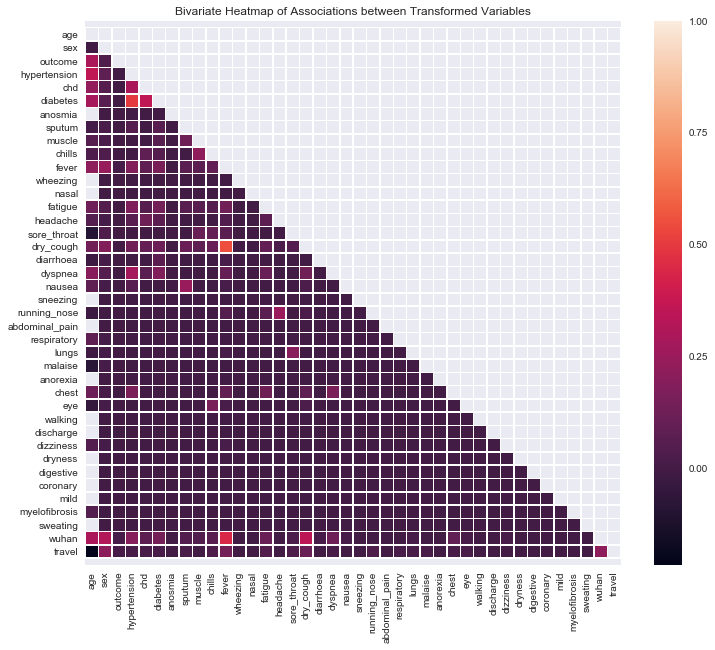

In [21]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 10))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

_ = sns.heatmap(pd.DataFrame(corr, columns=cols, index=cols), ax=ax, mask=mask, linewidths=.5)

bottom, top = ax.get_ylim()
_ = ax.set_ylim(bottom + 0.5, top - 0.5)
_ = ax.set_title('Bivariate Heatmap of Associations between Transformed Variables')

### Logistic Regression

A simple logistic regression model using area under the curve (AUC) for ROC (5%) and PR (3%) shows very unpromising results. Furthermore, the sensitivity (recall on the positive class) is 10% and the specificity (recall on the negative class) is 99%; the classifier is specific, but not sensitive. 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, accuracy_score
from imblearn.metrics import sensitivity_score, specificity_score

X =  d.drop('outcome', axis=1)
y = d.outcome

print(X.shape, y.shape)

(205, 39) (205,)


In [23]:
model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=37)
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

acc = accuracy_score(y, y_pred)
sen = sensitivity_score(y, y_pred)
spe = specificity_score(y, y_pred)

roc = roc_auc_score(y, y_prob[:,0])
pr = average_precision_score(y, y_prob[:,0])
print(f'acc={acc:.5f}, sen={sen:.5f}, spe={spe:.5f}, roc={roc:.5f}, pr={pr:.5f}')
print(classification_report(y, y_pred))

acc=0.94634, sen=0.10000, spe=0.98974, roc=0.04410, pr=0.02843
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       195
           1       0.33      0.10      0.15        10

    accuracy                           0.95       205
   macro avg       0.64      0.54      0.56       205
weighted avg       0.93      0.95      0.93       205



The only variable with a `harmful` effect on prognosis is `age`. 

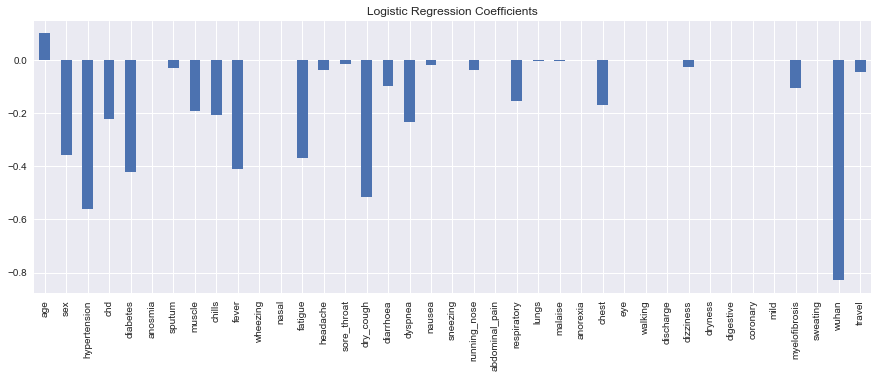

In [24]:
s = pd.Series(model.coef_[0], X.columns)

fig, ax = plt.subplots(figsize=(15, 5))
_ = s.plot(kind='bar', ax=ax, title='Logistic Regression Coefficients')

Since the AUC for ROC and PR were so bad, we [inverted](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#ROC_space) the decision of the classifier and obtained better results.

In [25]:
roc = roc_auc_score(y, y_prob[:,1])
pr = average_precision_score(y, y_prob[:,1])
print(f'roc={roc:.5f}, pr={pr:.5f}')

roc=0.95590, pr=0.39988


### Oversampling

Let's try some oversampling techniques.

* Random oversampling
* SMOTE
* ADASYN

In [26]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X =  d.drop('outcome', axis=1)
y = d.outcome

print(X.shape, y.shape)

ros = RandomOverSampler(random_state=37)
X, y = ros.fit_resample(X, y)

print(sorted(Counter(y).items()))

(205, 39) (205,)
[(0, 195), (1, 195)]


In [27]:
model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=37)
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

acc = accuracy_score(y, y_pred)
sen = sensitivity_score(y, y_pred)
spe = specificity_score(y, y_pred)

roc = roc_auc_score(y, y_prob[:,0])
pr = average_precision_score(y, y_prob[:,0])
print(f'acc={acc:.5f}, sen={sen:.5f}, spe={spe:.5f}, roc={roc:.5f}, pr={pr:.5f}')
print(classification_report(y, y_pred))

acc=0.94103, sen=1.00000, spe=0.88205, roc=0.04247, pr=0.34502
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       195
           1       0.89      1.00      0.94       195

    accuracy                           0.94       390
   macro avg       0.95      0.94      0.94       390
weighted avg       0.95      0.94      0.94       390



In [28]:
roc = roc_auc_score(y, y_prob[:,1])
pr = average_precision_score(y, y_prob[:,1])
print(f'roc={roc:.5f}, pr={pr:.5f}')

roc=0.95753, pr=0.92515


In [29]:
from imblearn.over_sampling import SMOTE, ADASYN

X =  d.drop('outcome', axis=1)
y = d.outcome

print(X.shape, y.shape)

X, y = SMOTE().fit_resample(X, y)

print(sorted(Counter(y).items()))

model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=37)
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

acc = accuracy_score(y, y_pred)
sen = sensitivity_score(y, y_pred)
spe = specificity_score(y, y_pred)

roc = roc_auc_score(y, y_prob[:,0])
pr = average_precision_score(y, y_prob[:,0])
print(f'acc={acc:.5f}, sen={sen:.5f}, spe={spe:.5f}, roc={roc:.5f}, pr={pr:.5f}')
print(classification_report(y, y_pred))

(205, 39) (205,)
[(0, 195), (1, 195)]
acc=0.95385, sen=0.97436, spe=0.93333, roc=0.02886, pr=0.34509
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       195
           1       0.94      0.97      0.95       195

    accuracy                           0.95       390
   macro avg       0.95      0.95      0.95       390
weighted avg       0.95      0.95      0.95       390



In [30]:
X =  d.drop('outcome', axis=1)
y = d.outcome

print(X.shape, y.shape)

X, y = ADASYN().fit_resample(X, y)

print(sorted(Counter(y).items()))

model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=37)
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

acc = accuracy_score(y, y_pred)
sen = sensitivity_score(y, y_pred)
spe = specificity_score(y, y_pred)

roc = roc_auc_score(y, y_prob[:,0])
pr = average_precision_score(y, y_prob[:,0])
print(f'acc={acc:.5f}, sen={sen:.5f}, spe={spe:.5f}, roc={roc:.5f}, pr={pr:.5f}')
print(classification_report(y, y_pred))

(205, 39) (205,)
[(0, 195), (1, 195)]
acc=0.95128, sen=0.96923, spe=0.93333, roc=0.03074, pr=0.35215
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       195
           1       0.94      0.97      0.95       195

    accuracy                           0.95       390
   macro avg       0.95      0.95      0.95       390
weighted avg       0.95      0.95      0.95       390



### Undersampling

We are curious to see what undersampling may do.

In [31]:
from imblearn.under_sampling import ClusterCentroids

X =  d.drop('outcome', axis=1)
y = d.outcome

print(X.shape, y.shape)

X, y = ClusterCentroids(random_state=37).fit_resample(X, y)

print(sorted(Counter(y).items()))

model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=37)
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)

acc = accuracy_score(y, y_pred)
sen = sensitivity_score(y, y_pred)
spe = specificity_score(y, y_pred)

roc = roc_auc_score(y, y_prob[:,0])
pr = average_precision_score(y, y_prob[:,0])
print(f'acc={acc:.5f}, sen={sen:.5f}, spe={spe:.5f}, roc={roc:.5f}, pr={pr:.5f}')
print(classification_report(y, y_pred))

(205, 39) (205,)
[(0, 10), (1, 10)]
acc=0.95000, sen=1.00000, spe=0.90000, roc=0.09000, pr=0.35476
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



### K-Fold Cross Validation

Let's do 5-fold cross validation and see what the average results are for the following performance metrics.

In [32]:
from sklearn.model_selection import StratifiedKFold

X =  d.drop('outcome', axis=1).to_numpy()
y = d.outcome.to_numpy()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)

results = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train, y_train = SMOTE().fit_resample(X_train, y_train)

    model = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=37)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    sen = sensitivity_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)

    roc = roc_auc_score(y_test, y_prob[:,0])
    pr = average_precision_score(y_test, y_prob[:,0])
    
    iroc = roc_auc_score(y_test, y_prob[:,1])
    ipr = average_precision_score(y_test, y_prob[:,1])
    
    metrics = [acc, sen, spe, roc, pr, iroc, ipr]
    print(','.join([f'{m:.5f}' for m in metrics]))
    results.append(metrics)

0.97561,1.00000,0.97436,0.01923,0.03721,0.98077,0.58333
0.95122,0.50000,0.97436,0.04487,0.03790,0.95513,0.45000
0.78049,0.50000,0.79487,0.17949,0.04316,0.82051,0.16234
0.87805,1.00000,0.87179,0.02564,0.03721,0.97436,0.50000
0.90244,1.00000,0.89744,0.03205,0.03782,0.96795,0.50000


The average performances from k-fold cross validation of the classifier are shown below.

In [33]:
pd.DataFrame(results, columns=['acc', 'sen', 'spe', 'roc', 'pr', 'iroc', 'ipr']).mean()

acc     0.897561
sen     0.800000
spe     0.902564
roc     0.060256
pr      0.038660
iroc    0.939744
ipr     0.439134
dtype: float64

## Survival Analysis

Now we will estimate survival from the recorded date of onset of symptoms using Kaplan-Meier estimation and Cox Proportional Hazards (CPH).

### Kaplan-Meier Survival Estimation

In [34]:
from datetime import datetime

def get_start_date(r):
    if not pd.isna(r.date_onset_symptoms) and len(r.date_onset_symptoms) > 0:
        s =  r.date_onset_symptoms
    elif not pd.isna(r.date_admission_hospital) and len(r.date_admission_hospital) > 0:
        s = r.date_admission_hospital
    else:
        s = r.date_confirmation
        
    s = s.replace('-', '').strip()
    s = s.split(' ')[0].strip()
    return s

def parse_date(v):
    s = v.split(' ')[0]
    if s.endswith('20202'):
        s = s[0:len(s) - 1]
        
    try:
        return datetime.strptime(s, '%d.%m.%Y')
    except:
        return datetime.strptime(s, '%m.%d.%Y')

d = data[['date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 'date_death_or_discharge', 'outcome']].copy(deep=True)
d.shape

# drop nulls
d = d.dropna(axis=0, how='all')
print(d.shape, 'all nulls')

d['start'] = d.apply(lambda r: get_start_date(r), axis=1)
d = d[pd.notna(d.start)]
d.start = d.start.apply(lambda s: parse_date(s))
print(d.shape, 'start')

d['stop'] = d.date_death_or_discharge
d = d[pd.notna(d.stop)]
d.stop = d.stop.apply(lambda s: parse_date(s))
print(d.shape, 'stop')

d.outcome = d.outcome.apply(lambda v: map_outcome(v))
d = d[pd.notna(d.outcome)]
d['E'] = d.outcome.apply(lambda v: 1 if v == 'death' else None if v is None else 0)
print(d.shape, 'outcome')

d['T'] = d.apply(lambda r: int((r.stop - r.start).days), axis=1)
d['T'] = d['T'].apply(lambda t: abs(t))
d = d[d['T'] >= 0]
print(d.shape, 'time')

d = d.drop(['date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 'date_death_or_discharge', 'outcome', 'start', 'stop'], axis=1)
print(d.shape, 'final')

(46240, 5) all nulls
(46240, 6) start
(212, 7) stop
(210, 8) outcome
(210, 9) time
(210, 2) final


In [35]:
from lifelines import KaplanMeierFitter

T = d['T']
E = d.E

kmf = KaplanMeierFitter()
_ = kmf.fit(T, event_observed=E)

The median survival time is the time at which 50% of the patients suffer from the outcome. Here, the median survival time is `infinite`, meaning, patients have a good chance of surviving the disease. For the patients in this part of the study, all of them died within 41 days, after which all patients no longer died.

In [36]:
# kmf.timeline

In [37]:
# kmf.cumulative_density_

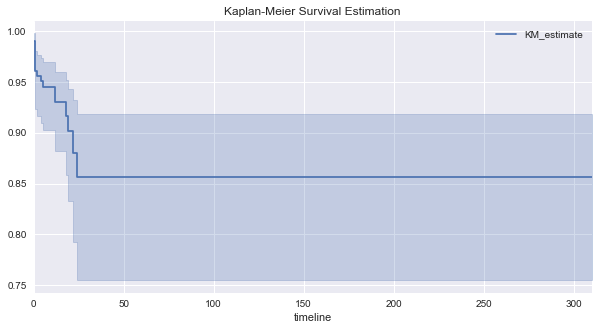

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))

_ = kmf.plot(ax=ax, title='Kaplan-Meier Survival Estimation')

### Cox Proportional Hazard

Now we can use survival regression with CPH to see how the covariates influence survival. Note that there are convergence issues involved with the optimization technique to recover these coefficients, and so these results are **not to be trusted**. 

In [39]:
d = data[['age', 'sex', 'chronic_disease', 'symptoms', 
          'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 'date_death_or_discharge', 'outcome', 
          'lives_in_Wuhan', 'travel_history_dates']].dropna(how='all').copy(deep=True)
print(d.shape, 'original')

d.outcome = d.outcome.apply(lambda v: map_outcome(v))
d = d[pd.notna(d.outcome)]
d['E'] = d.outcome.apply(lambda v: 1 if v == 'death' else None if v is None else 0)
print(d.shape, d.E.sum(), 'outcome')

# impute the average age, if needed
avg_age = d.age.apply(lambda x: get_single_age_group(x))
avg_age = np.array([int(a.split('_')[0]) for a in avg_age if pd.notna(a)])
avg_age = avg_age.mean()

d.age = d.age.apply(lambda x: get_single_age_group(x))
d.age = d.age.apply(lambda a: int(a.split('_')[0]) if pd.notna(a) else avg_age)
print(d.shape, d.E.sum(), 'age')

d.sex = d.sex.apply(lambda v: 1 if v == 'male' else 0)
print(d.shape, d.E.sum(), 'sex')

# chronic diseases
d.chronic_disease = d.chronic_disease.apply(lambda s: tokenize(s))
d.chronic_disease = d.chronic_disease.apply(lambda tokens: [map_to_disease(d) for d in tokens] if tokens is not None else None)
print(d.shape, d.E.sum(), 'chronic disease')

d['hypertension'] = d.chronic_disease.apply(lambda arr: 0 if arr is None else 1 if 'hypertension' in arr else 0)
d['chd'] = d.chronic_disease.apply(lambda arr: 0 if arr is None else 1 if 'coronary_hearth_disease' in arr else 0)
d['diabetes'] = d.chronic_disease.apply(lambda arr: 0 if arr is None else 1 if 'diabetes' in arr else 0)
print(d.shape, d.E.sum(), 'chronic disease 2')

# symptoms
d.symptoms = d.symptoms.apply(lambda s: tokenize(s))
d.symptoms = d.symptoms.apply(lambda tokens: [map_to_symptoms(s) for s in tokens] if tokens is not None else None)
d.symptoms = d.symptoms.apply(lambda arrs: None if arrs is None else list(itertools.chain(*arrs)))
print(d.shape, d.E.sum(), 'symptoms')

for s in symptom_map.keys():
    d[s] = d.symptoms.apply(lambda arr: 0 if arr is None else 1 if s in arr else 0)
print(d.shape, d.E.sum(), 'symptoms 2')

d['wuhan'] = d.lives_in_Wuhan.apply(lambda v: 1 if map_wuhan_residency(v) == 'yes' else 0)
d['travel'] = d.travel_history_dates.apply(lambda v: map_travel(v))
print(d.shape, d.E.sum(), 'wuhan, travel')

# compute the duration
# assumption: negative durations are turned into absolute value
d['start'] = d.apply(lambda r: get_start_date(r), axis=1)
d = d[pd.notna(d.start)]
d.start = d.start.apply(lambda s: parse_date(s))
print(d.shape, d.E.sum(), 'start')

d['stop'] = d.date_death_or_discharge
d = d[pd.notna(d.stop)]
d.stop = d.stop.apply(lambda s: parse_date(s))
print(d.shape, d.E.sum(), 'stop')

d['T'] = d.apply(lambda r: int((r.stop - r.start).days), axis=1)
d['T'] = d['T'].apply(lambda t: abs(t))
d = d[d['T'] >= 0]
print(d.shape, d.E.sum(), 'duration')

d = d.drop(['date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 'date_death_or_discharge', 
            'outcome', 'start', 'stop', 'lives_in_Wuhan', 'chronic_disease', 'symptoms',
            'travel_history_dates'], axis=1)
print(d.shape, d.E.sum(), 'final')

(46251, 11) original
(310, 12) 17 outcome
(310, 12) 17 age
(310, 12) 17 sex
(310, 12) 17 chronic disease
(310, 15) 17 chronic disease 2
(310, 15) 17 symptoms
(310, 47) 17 symptoms 2
(310, 49) 17 wuhan, travel
(310, 50) 17 start
(210, 51) 17 stop
(210, 52) 17 duration
(210, 41) 17 final


In [40]:
s = d.sum()
remove_cols = [c for c, v in zip(s.index, s.values) if v <= 0 and c != 'E']
d = d.drop(remove_cols, axis=1)
print(d.shape, d.E.sum(), 'remove zero cols')

(210, 28) 17 remove zero cols


In [41]:
from lifelines import CoxPHFitter
import warnings

warnings.filterwarnings('ignore')

cph = CoxPHFitter()
cph.fit(d, duration_col='T', event_col='E')

cph.print_summary()